# アルゴリズム 4.2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch import autograd

In [2]:
np.random.seed(0)
torch.manual_seed(0)

In [3]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(2, 64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(64, 64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(64, 1),
        )

    def forward(self, input):
        return self.main(input)

In [4]:
discriminator = Discriminator()

optimizer_discriminator = optim.SGD(discriminator.parameters(), lr=0.001)
lam = 10

In [5]:
# 分布 alpha
def gen_alpha():
    theta = torch.rand(1) * 2 * torch.pi
    r = 2 * theta + 1
    p = torch.FloatTensor([r * torch.cos(theta), r * torch.sin(theta)])
    p += torch.rand(2)
    return p

In [6]:
# 分布 beta
def gen_beta():
    theta = torch.rand(1) * 2 * torch.pi
    r = - 2 * theta - 1
    p = torch.FloatTensor([r * torch.cos(theta), r * torch.sin(theta)])
    p += torch.rand(2)
    return p

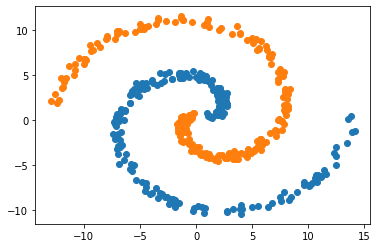

In [7]:
# 分布の可視化
a = np.array([gen_alpha().numpy() for i in range(200)])
b = np.array([gen_beta().numpy() for i in range(200)])
plt.scatter(a[:, 0], a[:, 1])
plt.scatter(b[:, 0], b[:, 1])

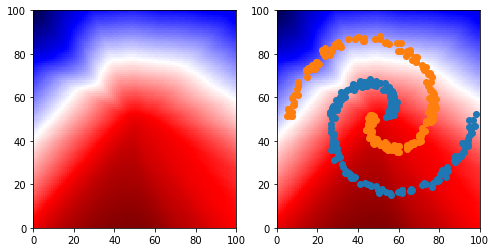

<Figure size 432x288 with 0 Axes>

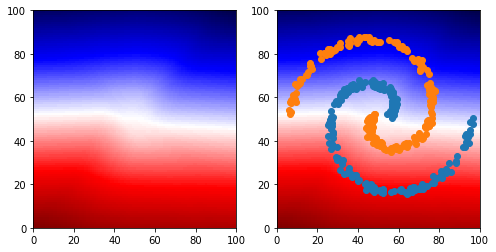

<Figure size 432x288 with 0 Axes>

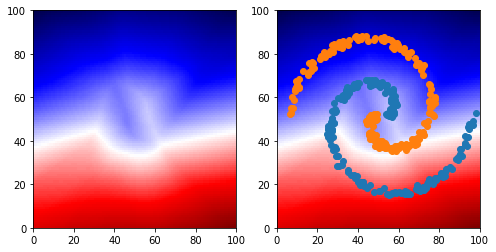

<Figure size 432x288 with 0 Axes>

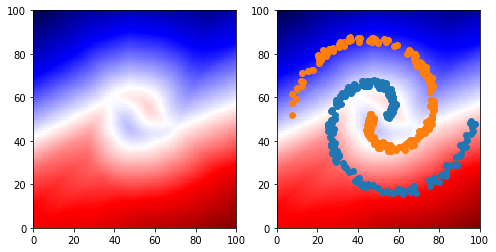

<Figure size 432x288 with 0 Axes>

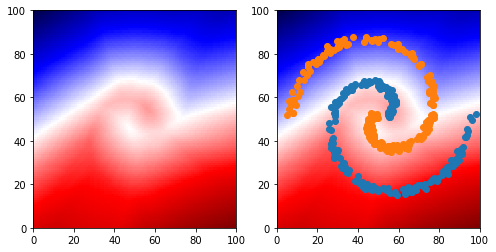

<Figure size 432x288 with 0 Axes>

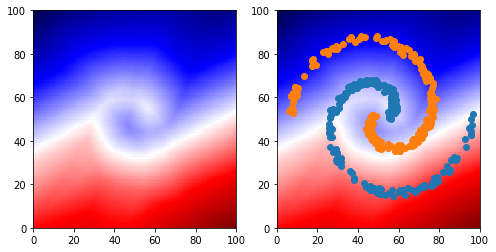

<Figure size 432x288 with 0 Axes>

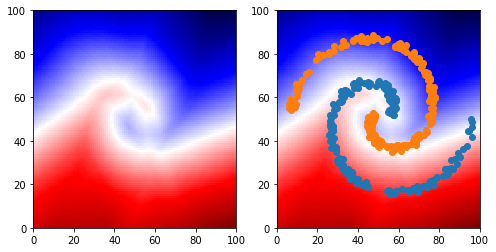

<Figure size 432x288 with 0 Axes>

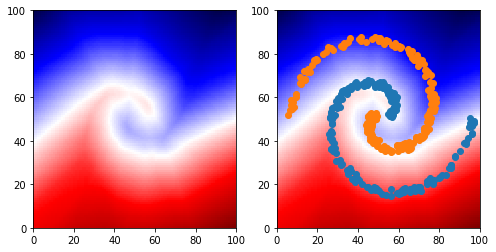

<Figure size 432x288 with 0 Axes>

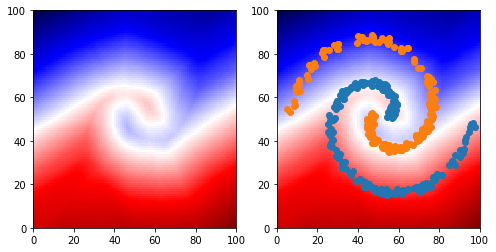

<Figure size 432x288 with 0 Axes>

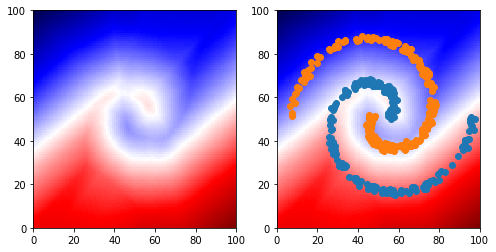

<Figure size 432x288 with 0 Axes>

In [8]:
# アルゴリズム 4.2
for i in range(100000):
    x = gen_alpha().reshape(1, 2)
    y = gen_beta().reshape(1, 2)

    t = torch.rand(1)
    x_hat = t * x + (1 - t) * y
    x_hat.requires_grad_(True)
    x_hat_out = discriminator(x_hat)

    grad = autograd.grad(outputs=x_hat_out, inputs=x_hat,
                        grad_outputs=torch.ones(x_hat_out.shape),
                        create_graph=True, retain_graph=True)[0]

    loss = - discriminator(x) + discriminator(y) + lam * ((grad.norm() - 1) ** 2).mean()

    optimizer_discriminator.zero_grad()
    loss.backward()
    optimizer_discriminator.step()

    if i % 10000 == 0:
        # 可視化
        fig = plt.figure(figsize=(8, 4))
        x = np.linspace(-15, 15, 100)
        y = np.linspace(-15, 15, 100)
        x, y = np.meshgrid(x, y)
        data = torch.FloatTensor(np.vstack([x.reshape(-1), y.reshape(-1)]).T)
        res = discriminator(data)
        ax = fig.add_subplot(1, 2, 1)
        ax.pcolor(res.detach().numpy().reshape(100, 100), cmap='seismic')

        a = np.array([gen_alpha().numpy() for i in range(200)])
        b = np.array([gen_beta().numpy() for i in range(200)])
        ax = fig.add_subplot(1, 2, 2)
        ax.pcolor(res.detach().numpy().reshape(100, 100), cmap='seismic')
        ax.scatter(a[:, 0] * 100 / 30 + 50, a[:, 1] * 100 / 30 + 50)
        ax.scatter(b[:, 0] * 100 / 30 + 50, b[:, 1] * 100 / 30 + 50)

        plt.show()
        plt.clf()